#Parte 2

## P6

### Ejemplo YOLO V3


In [ ]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 14327 (delta 0), reused 0 (delta 0), pack-reused 14326
Receiving objects: 100% (14327/14327), 12.86 MiB | 11.10 MiB/s, done.
Resolving deltas: 100% (9776/9776), done.


In [ ]:
!ls
%cd darknet
!ls
% cd ..

darknet  sample_data
/content/darknet
3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       video_yolov3.sh
cfg		data			net_cam_v3.sh	       video_yolov4.sh
cmake		image_yolov3.sh		net_cam_v4.sh
CMakeLists.txt	image_yolov4.sh		README.md
/content


In [ ]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2020-10-05 18:07:07--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.16.29
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.16.29|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?cB0lldeIEyLbP9Ds75kBOkS-VqrTxkNK6p8uWzgPyLpmtx1HNlud9n8F8NAMDBGslrzIydCsfw8czjb3xRJVypVwinlGW8d0W_vZ_zIMFhuhJKe0sUB3gY6JnufabU5QbFsGmSjQF6rs8CvuFQMLDs7gWx6KhPHxwURsKsBEYKzk22dGJqWmZY3LtVpYM7mdNUQa3YARgZimsh-7DbF9aEnlWw [following]
--2020-10-05 18:07:08--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?cB0lldeIEyLbP9Ds75kBOkS-VqrTxkNK6p8uWzgPyLpmtx1HNlud9n8F8NAMDBGslrzIydCsfw8czjb3xRJVypVwinlGW8d0

In [ ]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 file:/var/cuda-repo-8-0-local-g

In [ ]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cuso

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [ ]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 23 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [ ]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [ ]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [ ]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=compute_80,code=[sm_80,compute_80]

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, X

In [ ]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
#Running make!
!make
!mkdir /content/darknet/data/results

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_res = cv::create

**Descarga de pesos de la red**

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-10-05 18:10:34--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   407KB/s    in 9m 37s  

2020-10-05 18:20:13 (420 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



**Detección sobre una imagen de ejemplo**

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/eagle.jpg

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

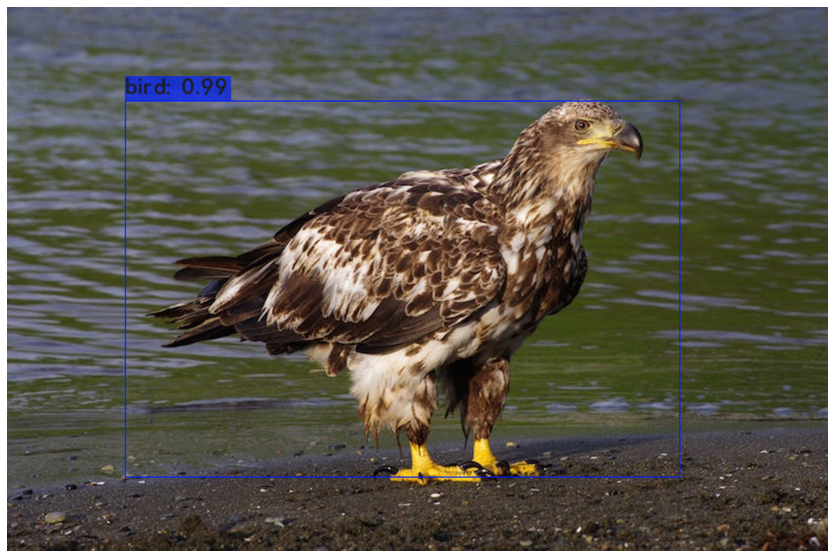

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

###Desarrollo Tracking Pregunta 6

**Cargar archivo "examples.rar"**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving examples.rar to examples.rar


In [ ]:
!unrar x examples.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from examples.rar

Creating    examples                                                  OK
Extracting  examples/image-0013.jpg                                        7%  9%  OK 
Extracting  examples/image-0105.jpg                                       16% 18%  OK 
Extracting  examples/pedestrian.jpg                                       59%  OK 
Extracting  examples/street.jpg                                           66% 73% 80% 87% 94% 99%  OK 
All OK


**Se hace una funcion con el codigo entregado para la visualizacion de los resultados**

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def show_prediction(prediction_imagen):
  image = cv2.imread(prediction_imagen)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

**Se realiza la deteccion con las imagenes del archivo cargado**

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

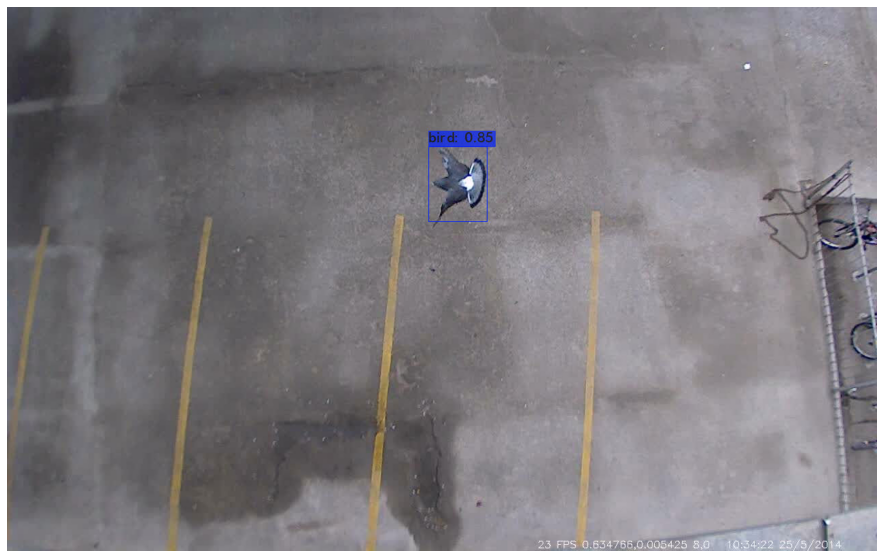

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights examples/image-0013.jpg
show_prediction('predictions.jpg')

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

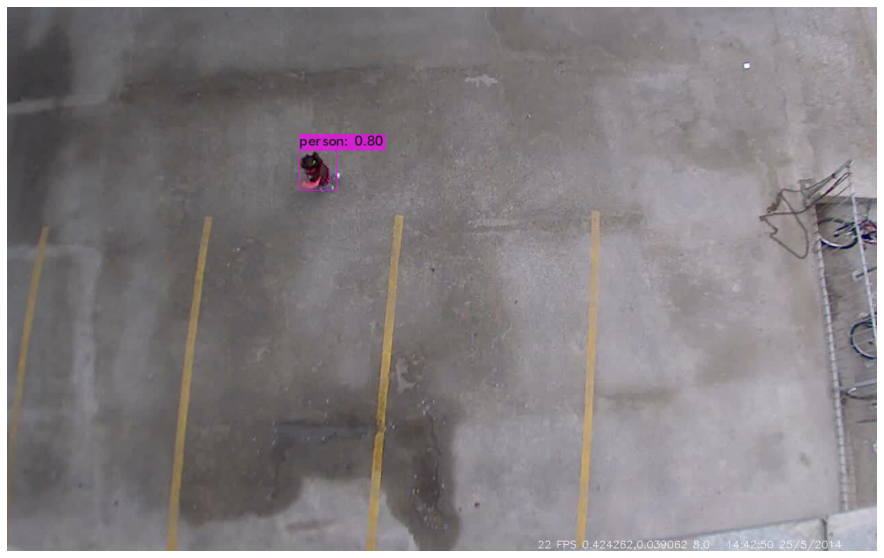

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights examples/image-0105.jpg
show_prediction('predictions.jpg')

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

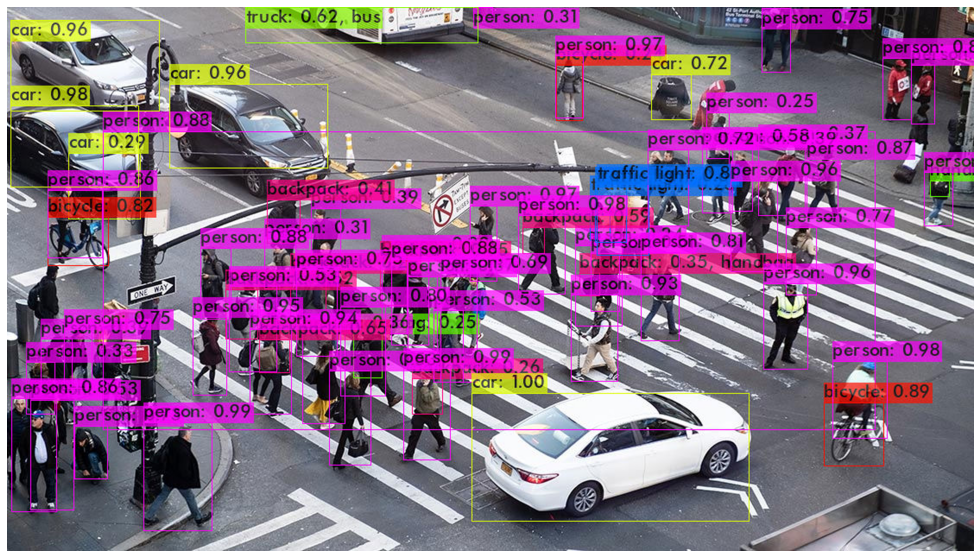

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights examples/pedestrian.jpg
show_prediction('predictions.jpg')

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

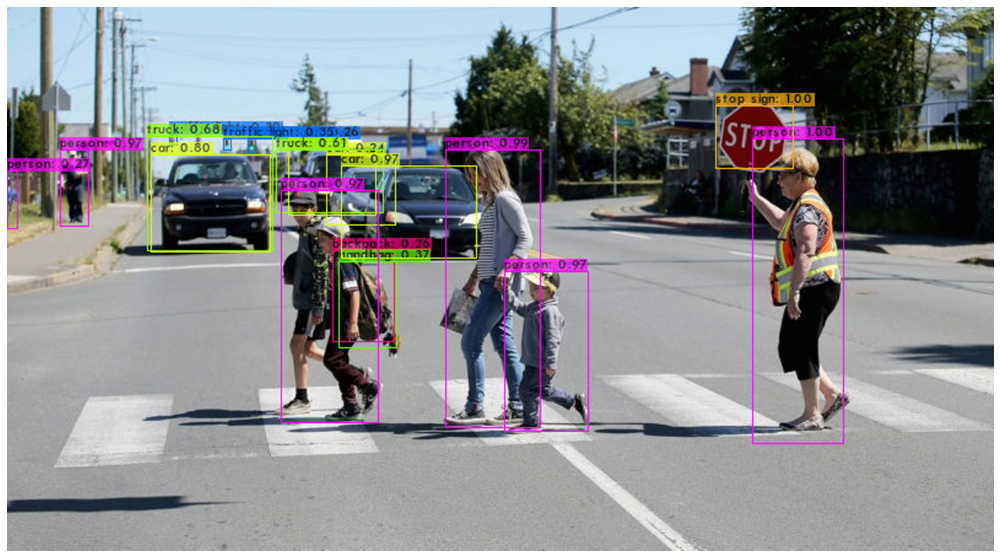

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights examples/street.jpg
show_prediction('predictions.jpg')

## P7

**Nos movemos a /content**

In [ ]:
%cd ..
!ls

/content
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  darknet	sample_data


### Pedestrian Tracking utilizando YOLOv3 y DeepSORT

Tracking de peatones que utiliza el proyecto de código abierto [ZQPei/deep_sort_pytorch](https://github.com/ZQPei/deep_sort_pytorch) que combina [DeepSORT](https://github.com/nwojke/deep_sort) con [YOLOv3](https://pjreddie.com/darknet/yolo/).




### Instala ZQPei/deep_sort_pytorch

In [ ]:
import os
from os.path import exists, join, basename

project_name = "deep_sort_pytorch"
if not exists(project_name):
  # clone and install
  !git clone -q --recursive https://github.com/ZQPei/deep_sort_pytorch.git
  
import sys
sys.path.append(project_name)

import IPython
from IPython.display import clear_output

### Descarga los pesos pre-entrenados de las redes (puede tardar varios minutos)

In [ ]:
yolo_pretrained_weight_dir = join(project_name, 'detector/YOLOv3/weight/')
if not exists(join(yolo_pretrained_weight_dir, 'yolov3.weights')):
  !cd {yolo_pretrained_weight_dir} && wget -q https://pjreddie.com/media/files/yolov3.weights
    
deepsort_pretrained_weight_dir = join(project_name, 'deep_sort/deep/checkpoint')
if not exists(join(deepsort_pretrained_weight_dir, 'ckpt.t7')):
  file_id = '1_qwTWdzT9dWNudpusgKavj_4elGgbkUN'
  !cd {deepsort_pretrained_weight_dir} && curl -Lb ./cookie "https://drive.google.com/uc?export=download&id={file_id}" -o ckpt.t7

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    141      0 --:--:--  0:00:02 --:--:--   141
100 43.9M    0 43.9M    0     0  11.8M      0 --:--:--  0:00:03 --:--:-- 79.1M


###Crear video de la seq4

**Cargar el archivo "seq4.rar". Si ya lo esta omitir este paso**

In [ ]:
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_1.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_2.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_3.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_4.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_5.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_6.rar
clear_output()

In [ ]:
!unrar x seq4_1.rar
!unrar x seq4_2.rar
!unrar x seq4_3.rar
!unrar x seq4_4.rar
!unrar x seq4_5.rar
!unrar x seq4_6.rar
clear_output()

**Se crea el video a partir de las imagenes del archivo cargado**

In [ ]:
import cv2
import numpy as np
import glob
from natsort import natsorted
 
img_array = []
#for filename in glob.glob('seq4/*.bmp'):
for filename in natsorted(os.listdir('seq4')):
  path = os.path.join('seq4',filename)
  print(path)
  img = cv2.imread(path)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)
 
 
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

### Tracking de personas

Función para visualizar videos:

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

Comando para ejecutar el tracking de personas en el video de prueba

In [ ]:
!cd deep_sort_pytorch && python yolov3_deepsort.py ../project.mp4 --save_path ../output.avi

Visualización de resultados:

In [ ]:
# first convert to mp4 to show in a Colab notebook
!ffmpeg -y -loglevel panic -i /content/output.avi/results.avi /content/output.avi/output.mp4
show_local_mp4_video('/content/output.avi/output.mp4', width=352, height=228)